In [1]:
import os
import ROOT as R
import math as M

Welcome to JupyROOT 6.24/06


In [2]:
R.gROOT.SetBatch(True)
R.gStyle.SetOptStat(0)
# R.gStyle.SetPadRightMargin(0.05)
R.gStyle.SetPadLeftMargin(0.1)
R.gStyle.SetPadRightMargin(0.15)
R.gStyle.SetPalette(R.kBird)
R.gROOT.ForceStyle()

In [3]:
# DIR_IN = '/Users/nbartosi/Cernbox/work/mu_collider/data/digi_bkg_QGSP_BERT_HP/c0_25ns_nEkin150'
# FILES_IN = [os.path.join(DIR_IN, 'sim_mod1_mumi-1e3x500-26m-lowth-excl.root')]
# DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_03_19_calo/digi/root/'
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/2022_10_17_ecal_shield'
FILES_IN = [os.path.join(DIR_IN, f'MuColl_v1{f}/mumi-1e3x500-26m-lowth-excl_t25ns_n150MeV_tuple.root') \
            for f in ['', '_mod2', '_mod3', '_mod4', '_mod5', '_mod6', '_mod7']]
# FILES_IN = [os.path.join(DIR_IN, 'dst_bkg_overlay.root'), os.path.join(DIR_IN, 'dst_bkg_overlay_mod2.root')]
# FILES_IN = [os.path.join(DIR_IN, name) for name in ['dst_bkg_overlay_v1.root', 'dst_photon_j1_bkg_1ev.root', 'dst_pion_j1_bkg_1ev_hcal5ns.root']]
DIR_OUT = os.path.join(DIR_IN, 'plots')

In [13]:
h_temp = {
#     'mcp_zy': R.TH2I('mcp_zy', ';Z [mm];Y [mm]', 800,-8e3,8e3, 200,-2e3,2e3),
#     'sth_rz': R.TH2I('sth_rz', ';Z [mm];R [mm]', 4000,-2500,2500, 1200,0,1500),
#     'sth_rz': R.TH2I('sth_rz', ';Z [mm];R [mm]', 10000,-500,500, 1500,0,150),
#     'sth_xy': R.TH2I('sth_xy', ';X [mm];Y [mm]', 3000,-150,150, 3000,-150,150),
#     'sth_zy': R.TH2I('sth_zy', ';Z [mm];Y [mm]', 600,-3e3,3e3, 200,-2e3,2e3),
#     'sch_zy': R.TH2F('sch_zy', ';Z [mm];Y [mm];E_{dep} [GeV]', 1600,-8e3,8e3, 800,-8e3,8e3),
#     'cah_zy': R.TH2F('cah_zy', ';Z [mm];Y [mm];E_{dep} [GeV]', 800,-8e3,8e3, 800,-8e3,8e3),
#     'cah_xy': R.TH2F('cah_xy', ';X [mm];Y [mm];E_{dep} [GeV]', 800,-8e3,8e3, 800,-8e3,8e3),
    'sch_zphi': R.TH2F('sch_zphi', ';Z [cm];#phi [rad];E_{dep} [MeV]', 800,-8e2,8e2, 128,-3.2,3.2),
    'sch_xy': R.TH2F('sch_xy', ';X [cm];Y [cm];E_{dep} [MeV]', 800,-8e2,8e2, 800,-8e2,8e2),
    'sch_r': R.TH1F('sch_r', ';R [cm];E_{dep} [MeV]', 2000,0,200),
    'sch_z': R.TH1F('sch_z', ';R [cm];E_{dep} [MeV]', 800,100,800),
#     'cah_zphi': R.TH2F('cah_zphi', ';Z [mm];#phi [rad];E_{dep} [GeV]', 1600,-8e3,8e3, 1280,-3.2,3.2),
#     'scene': R.TH1I('scene', ';Hit energy [GeV];Hits', 200,0,0.1),
#     'caene': R.TH1F('caene', ';Hit energy [MeV];Hits', 2000,0,200),
#     'stedp': R.TH1I('stedp', ';Hit energy [GeV];Hits', 200,0,0.01),
#     'sttim': R.TH1I('sttim', ';Hit time [s];Hits', 200,0,1e6),
#     'mcp_xy': R.TH2I('mcp_xy', ';X [mm];Y [mm]', 800,-8e3,8e3, 800,-8e3,8e3),
#     'mcp_z': R.TH1I('mcp_z', ';Z [mm];Particles', 80,-8e3,8e3),
#     'mcp_pdg': R.TH1I('mcp_pdg', ';PDG ID;Particles', 12000,-6e3,6e3),
#     'mcp_pdg': R.TH1I('mcp_pdg', ';PDG ID;Particles', 5000,0,5000),
# #     'mcp_pt': R.TH1I('mcp_pt', ';p_{T} [GeV];Particles', 200,0,200),
#     'mcp_p': R.TH1I('mcp_p', ';p [GeV];Particles', 200,0,5),
#     'mcp_time': R.TH1I('mcp_time', ';time [ns];Particles', 300,-100,500)
}

Warning in <TFile::Append>: Replacing existing TH1: sch_r (Potential memory leak).


In [5]:
# C = R.TCanvas('canvas', '', 1000, 575)
# C = R.TCanvas('canvas', '', 1000, 700)
C = R.TCanvas('canvas', '', 1000, 1000)
# C = R.TCanvas('canvas', '', 700, 800)

In [6]:
files_in = [R.TFile(file_in) for file_in in FILES_IN]
trees = [file_in.Get('MyLCTuple') for file_in in files_in]

### Filling histograms

In [14]:
colors = [1, 2, R.kAzure+2, R.kTeal+5, R.kOrange-4]
h_draw = {}

sel = "(sctim-sqrt(scpoy*scpoy + scpox*scpox + scpoz*scpoz)/0.3 < 300)"

# hname = 'sch_zphi'
# pdgs = [1]

# hname = 'sch_xy'
# pdgs = [2]

hname = 'sch_r'
pdgs = [1]

# pdgs = [22, 11, 2112]
# pdgs = [1]

sel_sch = {
    1: 'scori == 1 || scori == 2',
    2: 'scori == 3 || scori == 4 || scori == 5'
}

sel_cah = {
    1: 'caori == 1 || caori == 2',
    2: 'caori == 3 || caori == 4 || caori == 5'
}
sel_cah = {
    1: 'caori == 2',
    2: 'caori == 4 || caori == 5'
}

# sel_cah = {
#     1: '(caori == 1 || caori == 2) && caene > 5e-3',
#     2: '(caori == 3 || caori == 4 || caori == 5) && caene > 20e-3'
# }

# sel_cah = {
#     1: 'caori == 1 && caene > 5e-3',
#     3: 'caori == 3 && caene > 20e-3'
# }

sel_sth = {
    0: -1,
    1: 1
}

sel_sth2 = {
    0: "abs(stpoz) < 65 && stpox < 0",
    1: "abs(stpoz) > 65 && stpox > 0",
}


h_temp[hname].SetDirectory(R.gDirectory)
for iFile, tree in enumerate(trees):
    for pdg in pdgs:
        h_temp[hname].Reset()
    #     nEntries = tree.Draw('mcvty:mcvtz>>{0:s}'.format(hname), 'abs(mcpdg) == {0:d} && mcpa0 == -1'.format(pdg), 'goff')
#         nEntries = tree.Draw('sqrt(stpox*stpox + stpoy*stpoy):abs(stpoz)*{1:d}>>{0:s}'.format(hname, sel_sth[iFile]), 'stori < 3', 'goff')
#         nEntries = tree.Draw('stpoy:stpox>>{0:s}'.format(hname, sel_sth[iFile]), 'stori == 1 && {0:s}'.format(sel_sth2[iFile]), 'goff')
#         nEntries = tree.Draw('capoy:capoz>>{0:s}'.format(hname), 'caene*({0:s})'.format(sel_cah[pdg]), 'goff', 1)
#         nEntries = tree.Draw('capoy:capox>>{0:s}'.format(hname), 'caene*({0:s})'.format(sel_cah[pdg]), 'goff', 1)
#         nEntries = tree.Draw('atan2(capoy,capox):capoz>>{0:s}'.format(hname), 'caene*({0:s})'.format(sel_cah[pdg]), 'goff', 1)
#         nEntries = trees[iFile].Draw('caene*1e3>>{0:s}'.format(hname), 'caori=={0:d}'.format(pdg), 'goff')
#         nEntries = tree.Draw(f'TMath::ATan2(scpoy,scpox):scpoz/10.0>>{hname}', f'1000*scene*(scori == {pdg})', 'goff')
        nEntries = tree.Draw(f'sqrt(scpoy*scpoy + scpox*scpox)/10.0>>{hname}', f'1000*scene*(scori == {pdg})', 'goff')
#         nEntries = tree.Draw(f'scpoy/10:scpox/10>>{hname}', f'1000*scene*(scori == {pdg})', 'goff')
#         nEntries = tree.Draw('scpoy:scpoz>>{0:s}'.format(hname), 'scene*({0:s})'.format(sel_sch[pdg]), 'goff')
#         nEntries = tree.Draw('scpoy:scpoz>>{0:s}'.format(hname), 'scene*(scori == {0:d})'.format(pdg), 'goff')
    #     nEntries = trees[GEN_TYPE].Draw('stedp{1:s}>>{0:s}'.format(hname, mult[plist]), 'stori == {1:d} && {0:s}'.format(pdgs_sel[pdg], plist), 'goff')
    #     nEntries = trees[plist].Draw('mcvtx:mcvty>>{0:s}'.format(hname), '{0:s} && mcpa0 == -1'.format(pdgs_sel[pdg]), 'goff')
    #     nEntries = trees[plist].Draw('mcvtz>>{0:s}'.format(hname), '{0:s} && mcpa0 == -1'.format(pdgs_sel[pdg]), 'goff')
    #     nEntries = trees[plist].Draw('sqrt(mcmox*mcmox+mcmoy*mcmoy+mcmoz*mcmoz)>>{0:s}'.format(hname), 'mcpdg=={0:d} && mcpa0 == -1'.format(pdg), 'goff')
    #     nEntries = trees[plist].Draw('sqrt(mcmox*mcmox+mcmoy*mcmoy+mcmoz*mcmoz)>>{0:s}'.format(hname), '{0:s} && mcpa0 != -1'.format(pdgs_sel[pdg]), 'goff')
    #     nEntries = trees[plist].Draw('mctim>>{0:s}'.format(hname), '{0:s} && mcpa0 == -1'.format(pdgs_sel[pdg]), 'goff')
        print(iFile, pdg, nEntries)
        h_draw[(iFile, pdg)] = h_temp[hname].Clone('{0:s}_{1:d}'.format(hname, iFile))

0 1 6974199
1 1 6942219
2 1 6408253
3 1 2678293
4 1 4019811
5 1 4642698
6 1 5404312


In [37]:
leg_names = {
    22: '#gamma',
    2112: 'n',
    11: 'e^{#pm}',
    2212: 'ch. had.',
    13: '#mu^{#pm}'
}

### Drawing the hit depth

sch_r
 1961.4508325457573
_mod4 706.4392894208431
_mod7 1481.4294902682304


Info in <TCanvas::Print>: pdf file /Users/nbartosi/cernbox/work/mu_collider/data/2022_10_17_ecal_shield/plots/sch_r_1_w.pdf has been created


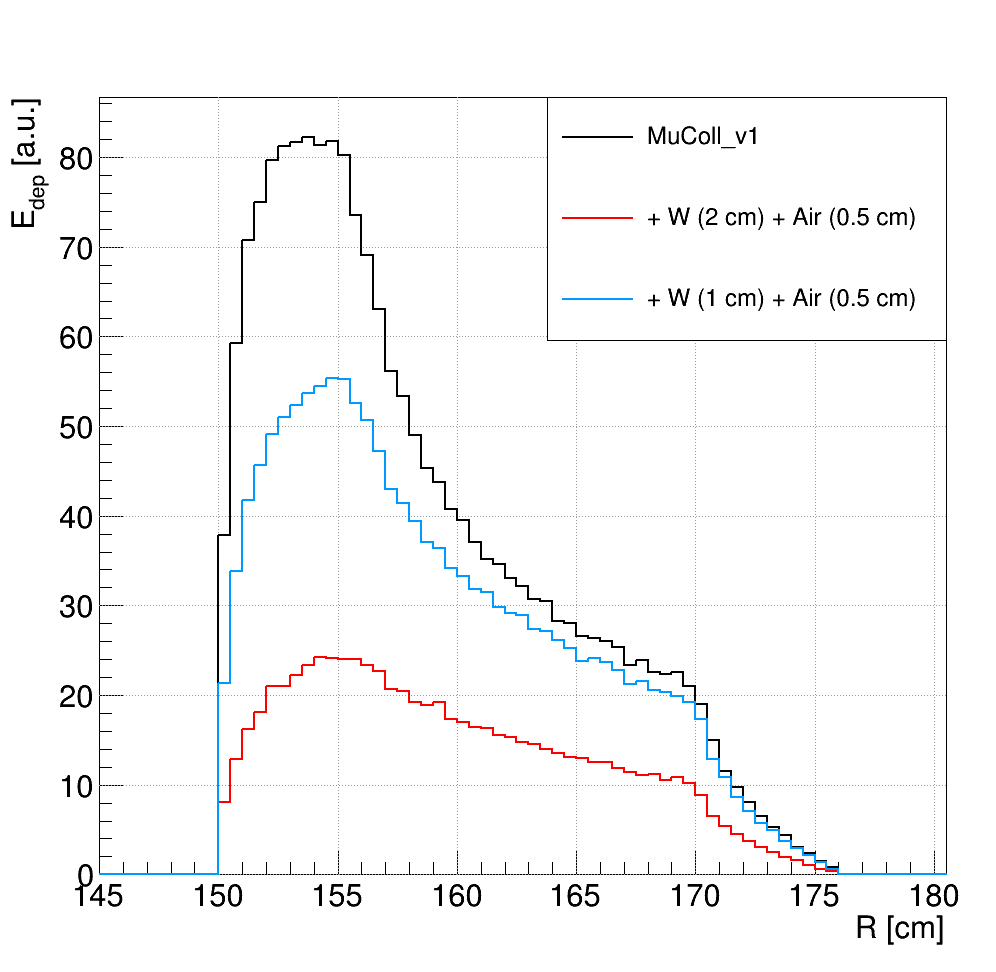

In [19]:
print(hname)
C.SetLogy(False)
C.SetRightMargin(0.05)
C.SetGrid()
R.gStyle.SetGridColor(15)
# colors = [2, R.kAzure+2]
colors = [1, 2, R.kAzure+7, R.kPink+7, R.kTeal+5]
mods = ['', '_mod2', '_mod3', '_mod4', '_mod5', '_mod6', '_mod7']
# leg_names = ['MuColl_v1', False, "+ Al (2 cm) + Air (0.5 cm)", "+ W (2 cm) + Air (0.5 cm)", "+ W (2 cm) + Air (2.5 cm)"]
leg_names = ['MuColl_v1', False, False, "+ W (2 cm) + Air (0.5 cm)", False, False, "+ W (1 cm) + Air (0.5 cm)"]
colors = [1,0,0, 2, 0,0, R.kAzure+7, R.kPink+7, R.kTeal+5]
# leg_names = ['MuColl_v1', False, False, "+ W (2 cm) + Air (0.5 cm)", "+ W (2 cm) + Air (2.5 cm)", "+ W (2 cm) + Air (0.1 cm)", False]
# colors = [1,0,0, 2, R.kAzure+7, R.kPink+7, R.kTeal+5]
for iP, pdg in enumerate(pdgs):
    leg = R.TLegend(0.55, 0.65, 0.95, 0.9)
    leg.SetBorderSize(1)
    leg.SetFillStyle(1001)
    leg.SetFillColor(0)
    for iMod, mod in enumerate(mods):
        if not leg_names[iMod]:
            continue
        drawopt = '' if iP == 0 else 'same'
        h = h_draw[(iMod, pdg)].Clone()
        R.SetOwnership(h, False)
#         print(pdg, h.GetEntries())
        h.Rebin(5)
        h.Scale(1e-3)
        print(mod, h.Integral())
        h.GetYaxis().SetTitle('E_{dep} [a.u.]')
        if iMod == 0:
#             h.GetYaxis().SetRangeUser(10, 1e8)
            h.SetAxisRange(145, 180, 'X')
            h.Draw('AXIS')
            h.Draw('AXIG same')
        h.SetLineWidth(2)
        h.SetLineColor(colors[iMod])
        h.Draw('hist same')
        leg.AddEntry(h, leg_names[iMod], 'l')
    leg.Draw()
    C.SaveAs(os.path.join(DIR_OUT, '{0:s}_{1:d}_w.pdf'.format(hname, pdg)))
    C.Draw()

### Drawing the particle's momentum

In [74]:
print(hname)
C.SetLogy(True)
# colors = [2, R.kAzure+2]
# colors = [2, R.kAzure+2, 1, R.kPink+1, R.kTeal+5]
for plist in GEN_TYPES:
    leg = R.TLegend(0.7, 0.65, 0.95, 0.9)
    leg.SetBorderSize(1)
    leg.SetFillStyle(1001)
    leg.SetFillColor(0)
    for iP, pdg in enumerate(pdgs):
        drawopt = '' if iP == 0 else 'same'
        h = h_draw[(plist, pdg)].Clone()
    #     h = None
    #     for plist in ['mi', 'pl']:
    #     for plist in ['pl']:
    #         if h is None:
    #             h = h_draw[(plist, pdg)].Clone()
    #         else:
    #             h.Add(h_draw[(plist, pdg)])
        R.SetOwnership(h, False)
        print(pdg, h.GetEntries())
        if iP == 0:
            h.GetYaxis().SetRangeUser(10, 1e8)
            h.GetXaxis().SetRangeUser(0, 1.0)
        h.SetLineWidth(2)
        h.SetLineColor(colors[iP])
        h.Draw(drawopt)
        leg.AddEntry(h, leg_names[pdg], 'l')
    leg.Draw()
    C.SaveAs(os.path.join(DIR_OUT, '{0:s}_{1:s}.pdf'.format(hname, plist)))

cah_zphi


NameError: name 'GEN_TYPES' is not defined

### Drawing time distribution

In [75]:
print(hname)
C.SetLogy(True)
colors = [1, R.kAzure+2, 2, R.kPink+1, R.kTeal+5]
leg = R.TLegend(0.8, 0.65, 0.95, 0.9)
leg.SetBorderSize(1)
leg.SetFillStyle(1001)
leg.SetFillColor(0)
leg_names = {
    22: '#gamma',
    2112: 'n',
    11: 'e^{#pm}',
    2212: 'ch. had.',
    13: '#mu^{#pm}'
}
for iP, pdg in enumerate(pdgs):
    drawopt = '' if iP == 0 else 'same'
    h = None
    for plist in ['mi', 'pl']:
#     for plist in ['mi']:
        if h is None:
            h = h_draw[(plist, pdg)].Clone()
        else:
            h.Add(h_draw[(plist, pdg)])
    R.SetOwnership(h, False)
    print(pdg, h.GetEntries())
    if iP == 0:
        h.GetYaxis().SetRangeUser(1, 2e8)
        h.GetXaxis().SetRangeUser(-30e-9, 300e-9)
    h.SetLineWidth(2)
    h.SetLineColor(colors[iP])
    h.Draw(drawopt)
    leg.AddEntry(h, leg_names[pdg], 'l')
leg.Draw()
C.Draw()
C.SaveAs(os.path.join(DIR_OUT, '{0:s}_v1.pdf'.format(hname)))

cah_zphi


KeyError: ('mi', 1)

### Drawing the ZY particle positions

In [80]:
# C = R.TCanvas('canvas', '', 1000, 800)
# C = R.TCanvas('canvas', '', 2000, 1600)
C = R.TCanvas('canvas', '', 1000, 575)
C.SetGridx()
C.SetGridy()
C.SetRightMargin(0.05)
# C.SetRightMargin(0.11)
# C.SetLeftMargin(0.13)
# C.SetRightMargin(0.17)
C.SetLogy(False)
C.SetLogz(False)
# z_range = {1: (0, 10), 3: (0, 4)}  # Z-Phi
z_range = {1: (0.01, 20), 2: (0.001, 10), 3: (1, 1e5)} # Z-Y
# x_range = {1: 3e3, 2: 5e3, 3: 6e3}
x_range = {1: 3e3, 2: 4.5e3, 3: 3e3} # Z-Y
# x_range = {1: 1e3, 2: 5e3, 3: 1e3}
# y_range = {1: (-3,-2), 3: (-3,-2)}
y_range = {1: 2e3, 2: 4e3, 3: 8e3}
# z_range = {11: 6e4, 22: 9e3, 13: 70, 2112: 1500, 2212: 240}
x_range = {3: (0, 350)}
y_range = {3: (0, 140)}
# x_range = {3: (-120, 120)}
# y_range = {3: (-120, 120)}
z_range = {3: (1, 8e3)}
h = None
for iFile, postfix in enumerate(['mod1', 'mod3']):
    for iP, pdg in enumerate(pdgs):
        print(iP, pdg)
        drawopt = '' if iP == 0 else 'same'
#         drawopt = 'colz'
        if not h:
            h = h_draw[(iFile,pdg)].Clone()
            continue
        else:
            h.Add(h_draw[(iFile, pdg)])
    #     if pdg == 1:
    #         h.Rebin2D(2,2)
    #     if pdg == 2:
    #         h.Rebin2D(4,4)
        h.Rebin2D(2, 2)
#         h.Scale(0.5)
        R.SetOwnership(h, False)
        h.GetYaxis().SetRangeUser(y_range[pdg][0], y_range[pdg][1])
        h.GetXaxis().SetRangeUser(x_range[pdg][0], x_range[pdg][1])
    #     if iP == 0:
#         h.GetYaxis().SetRangeUser(-y_range[pdg], y_range[pdg])
#         h.GetZaxis().SetTitleOffset(0.8)
    #     h.GetYaxis().SetRangeUser(-2000, 2000)
    #     h.GetXaxis().SetRangeUser(-3000, 6000)
        h.GetZaxis().SetRangeUser(z_range[pdg][0], z_range[pdg][1])
        h.SetLineWidth(2)
        h.SetLineColor(colors[iP])
        h.Draw(drawopt)
        l1 = R.TLine(0,0, 350, M.tan(M.radians(20))*350)
        l2 = R.TLine(0,0, 275, M.tan(M.radians(26))*275)
        for l in [l1, l2]:
            l.SetLineColor(R.kAzure+2)
            l.SetLineWidth(2)
            l.SetLineStyle(7)
            l.Draw()
        C.SaveAs(os.path.join(DIR_OUT, '{0}_{1}_{2:s}_lin2.png'.format(hname, pdg, postfix)))

0 3
0 3


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_03_19_calo/plots/maps/sth_rz_3_mod3_lin2.png has been created


### Drawing XY hit positions

0 1
0 1
0 1
0 1
0 1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/cernbox/work/mu_collider/data/2022_10_17_ecal_shield/plots/sch_zphi_1_e.png has been created
Info in <TCanvas::Print>: png file /Users/nbartosi/cernbox/work/mu_collider/data/2022_10_17_ecal_shield/plots/sch_zphi_1_e_mod2.png has been created
Info in <TCanvas::Print>: png file /Users/nbartosi/cernbox/work/mu_collider/data/2022_10_17_ecal_shield/plots/sch_zphi_1_e_mod3.png has been created
Info in <TCanvas::Print>: png file /Users/nbartosi/cernbox/work/mu_collider/data/2022_10_17_ecal_shield/plots/sch_zphi_1_e_mod4.png has been created
Info in <TCanvas::Print>: png file /Users/nbartosi/cernbox/work/mu_collider/data/2022_10_17_ecal_shield/plots/sch_zphi_1_e_mod5.png has been created


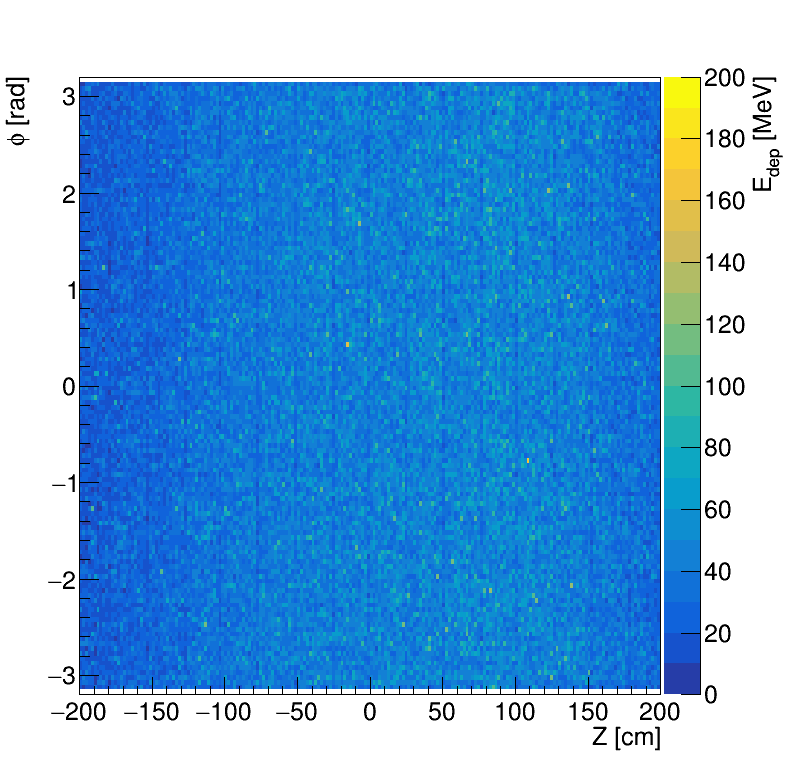

In [11]:
C = R.TCanvas('canvas', '', 800, 800)
# C.SetGridx()
# C.SetGridy()
C.SetRightMargin(0.17)
C.SetLogy(False)
C.SetLogz(False)
z_range = {1: (0, 200), 2: (0, 400), 3: (0, 50)} # Z-X
x_range = {1: 2e2, 2: 2e2, 3: 3e3} # Z-X
# y_range = {1: 2e3, 2: 4e3, 3: 8e3}
y_range = {1: 3.2, 2: 2e2}

mods = ['', '_mod2', '_mod3', '_mod4', '_mod5', '_mod6', '_mod7']
for iFile, postfix in enumerate(mods):
    for iP, pdg in enumerate(pdgs):
        print(iP, pdg)
        drawopt = '' if iP == 0 else 'same'
        drawopt = 'colz'
        h = h_draw[(iFile, pdg)].Clone()
#         if pdg == 1:
#             h.Rebin2D(2,2)
        if pdg == 2:
            h.Rebin2D(2,2)
#         h.Scale(0.5)
        R.SetOwnership(h, False)
    #     if iP == 0:
        h.GetYaxis().SetRangeUser(-y_range[pdg], y_range[pdg])
    #     h.GetYaxis().SetRangeUser(y_range[pdg][0], y_range[pdg][1])
        h.GetXaxis().SetRangeUser(-x_range[pdg], x_range[pdg])
        h.GetZaxis().SetTitleOffset(0.8)
    #     h.GetYaxis().SetRangeUser(-2000, 2000)
    #     h.GetXaxis().SetRangeUser(-3000, 6000)
        h.GetZaxis().SetRangeUser(z_range[pdg][0], z_range[pdg][1])
        h.GetZaxis().SetTitleOffset(1.5)
        h.GetYaxis().SetTitleOffset(1.4)
        h.SetLineWidth(2)
        h.SetLineColor(colors[iP])
        h.Draw(drawopt)
        C.SaveAs(os.path.join(DIR_OUT, '{0}_{1}_e{2:s}.png'.format(hname, pdg, postfix)))
C.Draw()

### Plotting hit energy depositions

In [178]:
print(hname)
C = R.TCanvas('canvas', '', 1000, 575)
C.SetRightMargin(0.05)

ax_ranges = {
    1: (0, 100),
    3: (0, 100)
}

ay_ranges = {
    1: (1e-4, 0.4),
    3: (1e-4, 0.1)
}

hIds = {
    1: [0,1,2,3],
    3: [0,1,3],
}

C.SetLogy(True)
C.SetGridy()
C.SetGridx()
colors = [1, R.kAzure+2, 2]
for pdg in [1, 3]:
    c = {
        'histos': [(0,pdg), (0, pdg+1), (1, pdg), (2, pdg)],
        'legs': ['BIB Barrel', 'BIB Endcap', '#gamma: 10 GeV', '#pi^{+}: 10 GeV'],
        'colors': [27, 1, R.kAzure+2, 2],
    }
    leg = R.TLegend(0.7, 0.95 - len(hIds[pdg])*0.07, 0.95, 0.9)
    leg.SetBorderSize(1)
    leg.SetFillStyle(1001)
    leg.SetFillColor(0)
    for iH in hIds[pdg]:
        drawopt = 'HIST' if iH == 0 else 'HISTsame'
        h = h_draw[c['histos'][iH]].Clone('h_{0:d}_{0:d}'.format(pdg, iH))
        h.Rebin(5)
        h.Scale(1.0 / h.Integral())
        R.SetOwnership(h, False)
        print(iH, h.Integral())
        if iH == 0:
            h.GetYaxis().SetRangeUser(ay_ranges[pdg][0], ay_ranges[pdg][1])
            h.GetXaxis().SetRangeUser(ax_ranges[pdg][0], ax_ranges[pdg][1])
            h.GetYaxis().SetTitle('A.U.')
        h.SetLineWidth(2)
        h.SetLineColor(c['colors'][iH])
        h.Draw(drawopt)
        leg.AddEntry(h, c['legs'][iH], 'l')
    leg.Draw()
    C.SaveAs(os.path.join(DIR_OUT, '{0:s}_{1:d}.pdf'.format(hname, pdg)))

caene
0 0.9999999946730895
1 0.9999999919950824
2 1.0000000016661943
3 1.000000001628905
0 0.9999999995488906
1 0.9999999966166797
3 0.9999999995634425


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_03_19_calo/plots/maps/caene_1.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_03_19_calo/plots/maps/caene_3.pdf has been created


### Plotting Pdg Ids of all MCParticles

In [21]:
h_draw = {}
for plist in GEN_TYPES:
    h_temp['mcp_pdg'].SetDirectory(R.gDirectory)
#     trees[plist].Draw('mcpdg>>mcp_pdg', '', 'goff')
    trees[plist].Draw('mcpdg/10 - 1e8>>mcp_pdg', 'abs(mcpdg) > 1e9', 'goff')
    h_draw[plist] = h_temp['mcp_pdg'].Clone('mcp_pdg_{0:s}'.format(plist))
#     trees[plist].Draw('mcpdg>>mcp_pdg', 'mcpa0 == -1', 'goff')
    trees[plist].Draw('mcpdg/10 - 1e8>>mcp_pdg', 'mcpa0 == -1 && abs(mcpdg) > 1e9', 'goff')
    h_draw[plist+'MARS'] = h_temp['mcp_pdg'].Clone('mcp_pdg_{0:s}'.format(plist))

In [26]:
C.SetLogy()
ax_rng = {
#     'full': {'x': (-6000, 6000), 'y': (1, 4e8)},
#     'centre': {'x': (-350, 350), 'y': (1, 4e8)},
    'nuclei': {'x': (2000, 2050), 'y': (1, 4e8)},
}
colors = [2, 1]
markers = [20, 5]
mu_sign = 'QGSP_BERT_HP'
for rng_name, rng in ax_rng.items():
    for iP, plist in enumerate([mu_sign, mu_sign+'MARS']):
    # for plist in ['QGSP_BERT_HP']:
        h = h_draw[plist]
        h.SetLineWidth(2)
        h.SetLineColor(colors[iP])
        h.SetMarkerStyle(markers[iP])
        h.SetMarkerColor(colors[iP])
        h.SetFillColor(colors[iP])
    #     h.GetXaxis().SetRangeUser(-300,2300)
    #     h.GetXaxis().SetRangeUser(-500,2500)
        h.GetXaxis().SetRangeUser(*rng['x'])
    #     h.GetXaxis().SetRangeUser(-60,60)
    #     h.GetYaxis().SetRangeUser(10,7e7)
        h.GetYaxis().SetRangeUser(*rng['y'])
        drawopt = 'hist' if iP == 0 else 'hist same'
        h.Draw(drawopt)
    #     h0.Draw('hist same')
    C.SaveAs(os.path.join(DIR_OUT, 'mcp_pdg_geant4_{1:s}_{0:s}.pdf'.format(rng_name, mu_sign)))

Info in <TCanvas::Print>: pdf file /Users/nbartosi/Cernbox/work/mu_collider/data/digi_bkg_QGSP_BERT_HP/plots/mcp_pdg_geant4_QGSP_BERT_HP_nuclei.pdf has been created


In [11]:
R.gDirectory.ls()

TFile**		/Users/nbartosi/Cernbox/work/mu_collider/data/sim_mod1_mumi-1e3x500-26m-lowth-excl_QGSP_BERT_EMV.root	ROOT_AIDA
 TFile*		/Users/nbartosi/Cernbox/work/mu_collider/data/sim_mod1_mumi-1e3x500-26m-lowth-excl_QGSP_BERT_EMV.root	ROOT_AIDA
  OBJ: TTree	MyLCTuple	columnwise ntuple with LCIO data : 0 at: 0x7fc565d090b0
  OBJ: TH1I	mcp_pt	 : 0 at: 0x7fc565970b10
  OBJ: TH1I	mcp_pt_22	 : 0 at: 0x7fc565d25570
  KEY: TTree	MyLCTuple;63	columnwise ntuple with LCIO data
  KEY: TTree	MyLCTuple;62	columnwise ntuple with LCIO data
  KEY: TH1D	hEvtProcessingTime;1	event processing time [s] 


In [13]:
h_temp['mcp_pdg'].GetEntries()

56128310.0

### Plotting data from the MARS original file

In [92]:
FILE_IN_MARS = R.TFile('/Users/nbartosi/Cernbox/work/mu_collider/data/mupl-1e3x500-26m-lowth-excl_Rndm.root')
histo = {'h_{0:s}'.format(suff): R.TH1I('h_{0:s}'.format(suff), '', 1100,-100,1000) for suff in ('draw', 'temp')}
# histo = {'h_{0:s}'.format(suff): R.TH1I('h_{0:s}'.format(suff), '', 80,-800,800) for suff in ('draw', 'temp')}
for iE in range(1829):
    FILE_IN_MARS.cd('Event{0:d}'.format(iE))
    tree = R.gDirectory.Get('MCBkg')
    histo['h_temp'].SetDirectory(R.gDirectory)
    tree.Draw("TOFF*1e9>>h_temp", "JJ==9")
    h = histo['h_draw']
    h.Add(histo['h_temp'], 26.0)
    print(iE, h.GetEntries())

0 46436.0
1 97136.0
2 154700.0
3 217256.0
4 268424.0
5 328380.0
6 391664.0
7 440752.0
8 499772.0
9 558142.0
10 604266.0
11 666744.0
12 717444.0
13 782912.0
14 829634.0
15 888186.0
16 949546.0
17 1004536.0
18 1053026.0
19 1107574.0
20 1160770.0
21 1214928.0
22 1297764.0
23 1366092.0
24 1421030.0
25 1478776.0
26 1531712.0
27 1593358.0
28 1647230.0
29 1697462.0
30 1755910.0
31 1818102.0
32 1877356.0
33 1929980.0
34 1986036.0
35 2038712.0
36 2089126.0
37 2137408.0
38 2234934.0
39 2294526.0
40 2360930.0
41 2427256.0
42 2475252.0
43 2531802.0
44 2590172.0
45 2641704.0
46 2700334.0
47 2750280.0
48 2809716.0
49 2860234.0
50 2921984.0
51 2981316.0
52 3032276.0
53 3087760.0
54 3137420.0
55 3200730.0
56 3252756.0
57 3309878.0
58 3367806.0
59 3427242.0
60 3481062.0
61 3536130.0
62 3590210.0
63 3639818.0
64 3698656.0
65 3750240.0
66 3804346.0
67 3868384.0
68 3929822.0
69 3983122.0
70 4025034.0
71 4073810.0
72 4122378.0
73 4179448.0
74 4238728.0
75 4289558.0
76 4345302.0
77 4414228.0
78 4466566.0
79

608 33890194.0
609 33938840.0
610 33995936.0
611 34057582.0
612 34122556.0
613 34173308.0
614 34229338.0
615 34286876.0
616 34341528.0
617 34401146.0
618 34449350.0
619 34497502.0
620 34552076.0
621 34607040.0
622 34662498.0
623 34720946.0
624 34776586.0
625 34824946.0
626 34877414.0
627 34927724.0
628 34982974.0
629 35030112.0
630 35080942.0
631 35133280.0
632 35188140.0
633 35243546.0
634 35300616.0
635 35352512.0
636 35407866.0
637 35460594.0
638 35518236.0
639 35583236.0
640 35650836.0
641 35699794.0
642 35767316.0
643 35832550.0
644 35885720.0
645 35934990.0
646 35987432.0
647 36038444.0
648 36088676.0
649 36146500.0
650 36208822.0
651 36265398.0
652 36320492.0
653 36363626.0
654 36412506.0
655 36470772.0
656 36523162.0
657 36582442.0
658 36629658.0
659 36682958.0
660 36738884.0
661 36791924.0
662 36842416.0
663 36896262.0
664 36953020.0
665 37011754.0
666 37056344.0
667 37111776.0
668 37173890.0
669 37226618.0
670 37288472.0
671 37345750.0
672 37403990.0
673 37459500.0
674 375118

1179 65402480.0
1180 65461162.0
1181 65515970.0
1182 65571168.0
1183 65625066.0
1184 65679484.0
1185 65728832.0
1186 65783510.0
1187 65832624.0
1188 65893048.0
1189 65947960.0
1190 66008436.0
1191 66062412.0
1192 66117220.0
1193 66163058.0
1194 66219244.0
1195 66280266.0
1196 66331122.0
1197 66392508.0
1198 66451398.0
1199 66506024.0
1200 66555476.0
1201 66608776.0
1202 66671150.0
1203 66727388.0
1204 66785836.0
1205 66837342.0
1206 66892150.0
1207 66945294.0
1208 67000570.0
1209 67056522.0
1210 67122718.0
1211 67180906.0
1212 67231138.0
1213 67288052.0
1214 67338518.0
1215 67395718.0
1216 67452944.0
1217 67498548.0
1218 67544906.0
1219 67596022.0
1220 67650310.0
1221 67709954.0
1222 67765438.0
1223 67824068.0
1224 67870452.0
1225 67935816.0
1226 67986386.0
1227 68041454.0
1228 68088826.0
1229 68136406.0
1230 68184272.0
1231 68241290.0
1232 68308292.0
1233 68364530.0
1234 68416712.0
1235 68465878.0
1236 68522376.0
1237 68577002.0
1238 68635606.0
1239 68690596.0
1240 68742206.0
1241 687

1712 94886558.0
1713 94940820.0
1714 94991026.0
1715 95048304.0
1716 95101916.0
1717 95159194.0
1718 95214704.0
1719 95267328.0
1720 95330144.0
1721 95394442.0
1722 95447456.0
1723 95500054.0
1724 95555356.0
1725 95606940.0
1726 95670354.0
1727 95720898.0
1728 95774900.0
1729 95829162.0
1730 95877548.0
1731 95938154.0
1732 95998942.0
1733 96052502.0
1734 96109156.0
1735 96166746.0
1736 96226156.0
1737 96277896.0
1738 96332392.0
1739 96381844.0
1740 96439798.0
1741 96492838.0
1742 96543382.0
1743 96598060.0
1744 96652894.0
1745 96708690.0
1746 96765292.0
1747 96814926.0
1748 96867654.0
1749 96916118.0
1750 96977010.0
1751 97036914.0
1752 97092216.0
1753 97149052.0
1754 97208072.0
1755 97265350.0
1756 97316258.0
1757 97370104.0
1758 97420544.0
1759 97481540.0
1760 97533540.0
1761 97592976.0
1762 97648694.0
1763 97709170.0
1764 97753786.0
1765 97820372.0
1766 97874790.0
1767 97927154.0
1768 97982326.0
1769 98037420.0
1770 98128290.0
1771 98179952.0
1772 98241650.0
1773 98296406.0
1774 983

Error in <TFile::cd>: Unknown directory Event1818
Error in <TFile::cd>: Unknown directory Event1819
Error in <TFile::cd>: Unknown directory Event1820
Error in <TFile::cd>: Unknown directory Event1821
Error in <TFile::cd>: Unknown directory Event1822
Error in <TFile::cd>: Unknown directory Event1823
Error in <TFile::cd>: Unknown directory Event1824
Error in <TFile::cd>: Unknown directory Event1825
Error in <TFile::cd>: Unknown directory Event1826
Error in <TFile::cd>: Unknown directory Event1827
Error in <TFile::cd>: Unknown directory Event1828


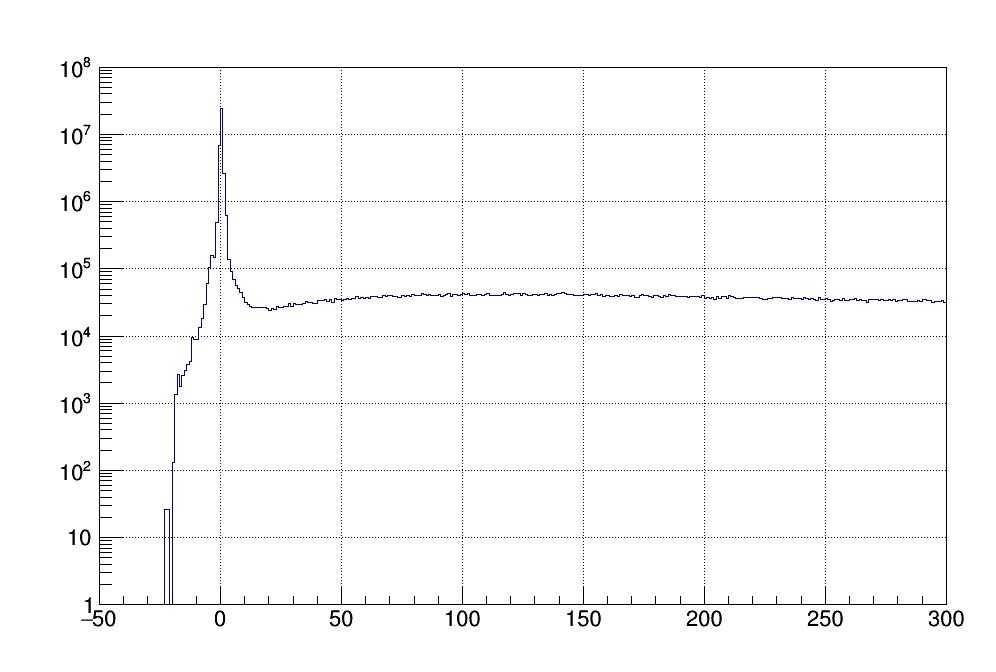

In [93]:
h = histo['h_draw']
h.GetXaxis().SetRangeUser(-50, 300)
h.GetYaxis().SetRangeUser(1, 1e8)
h.Draw()
C.Draw()

In [77]:
h_draw[('QGSP_BERT_HP', 22)].GetEntries()

7621458.0